This notebook shows the method to calculate the (approximate) distance between two GPS cordinates on the earths surface as discussed in https://www.lunarip.com/?p=86 post. 

In [1]:
from geopy.distance import great_circle
from geopy.distance import geodesic

Some knowns GPS cordinates, some geographically close, and then others in other hemispheres to validate the error ranges. 

Western US:
- Vancouver 	49.25 	-123.1
- Portland 	45.52 	-122.68
- San Francisco 	37.78 	-122.42
- Seattle 	47.62 	-122.33

Texas:
- San Antonio 	29.42 	-98.5
- Dallas 	32.78 	-96.8
- Austin 	30.25 	-97.75

Europe:
- Dublin 	53.35 	-6.27
- Sevilla 	37.38 	-5.98
- Belfast 	54.6

- Sydney 	-33.87 	151.22
- Canberra 	-35.3 	149.12
- Tokyo 	35.68 	139.7


In [2]:
Cities = { 'Vancouver':(49.25,-123.1),
    'Portland':(45.52,-122.68),
    'San Francisco':(37.78, -122.42),
    'Seattle':(47.62, -122.33),
    'San Antonio':(29.42, -98.5),
    'Dallas':(32.78,-96.8),
    'Austin':(30.25,-97.75),
    'Dublin':(53.35, -6.27),
    'Sevilla':(37.38, -5.98),
    'Belfast':(54.6,-5.93),
    'Sydney':(-33.87, 151.22),
    'Canberra':(-35.3, 149.12),
    'Tokyo':(35.68, 139.7)}


In [3]:
distance_gc = great_circle(Cities['Dublin'],Cities['San Francisco']).kilometers
print(f'Great circle arc lenght between Dublin and San Francisco via great circle is {distance_gc}km')


Great circle arc lenght between Dublin and San Francisco via great circle is 8175.711022467184km


https://dateandtime.info/distance.php?id1=5391959&id2=2964574 indicates that the distance is 8188 km


In [4]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()

In [5]:
Center = ('Center',0,0)
         
Cnames = ['Vancouver', 'Portland', 'San Francisco', 'Seattle', 
          'San Antonio', 'Dallas', 'Austin', 'Sevilla', 
          'Belfast', 'Sydney', 'Canberra', 'Tokyo']

In [6]:
nodes = []
for name in Cnames:
    nodes.append(name)
    G.add_node(name)
    G.add_edge(name,'Dublin')
    distance = great_circle(Cities['Dublin'],Cities[name]).kilometers
    G.edges['Dublin',name]['distance'] = round(distance,1)

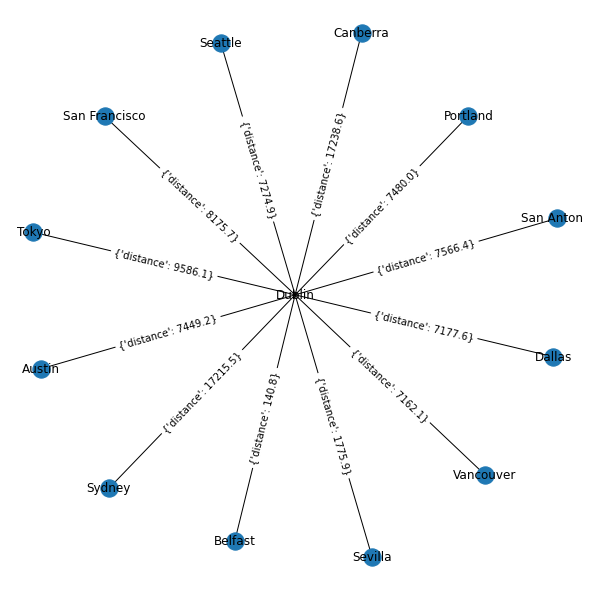

In [7]:
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G)
#label_pos = {k:[v0, v1+.2] for k, (v0,v1) in pos.items()}
nx.draw(G,nodelist=nodes,with_labels=True,pos=pos)
_ = nx.draw_networkx_edge_labels(G,pos=pos)